# Computational Drug Discovery [Part 2]

 Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


## **Install conda and rdkit**

In [1]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
import sys
import pandas as pd
sys.path.append('/usr/local/lib/python3.7/site-packages/')

rdkit is a cheminformatics library that is used to perform various tasks in computational chemistry. It is used to perform tasks such as descriptor calculation, molecular visualization, and molecular similarity calculations.

## **Load bioactivity data**

In [2]:
df = pd.read_csv('Data/03_bioactivity_data_curated.csv')
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,250.0,active
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,50.0,active
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,50000.0,inactive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  282 non-null    object 
 1   canonical_smiles    282 non-null    object 
 2   standard_value      282 non-null    float64
 3   class               282 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.9+ KB


In [4]:
df_clean_smiles = df.copy()
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len))
df_clean_smiles

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,250.0,active
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,50.0,active
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,50000.0,inactive
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,100000.0,inactive
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,100000.0,inactive
...,...,...,...,...
277,CHEMBL4863113,COC(=O)[C@H]1O[C@@H](NC(=O)c2ccc(S(N)(=O)=O)cc...,1800.0,intermediate
278,CHEMBL4865818,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@@H](...,3600.0,intermediate
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,50.0,active
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,50.0,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,222.251,-0.85610,2.0,6.0
1,236.278,-1.42380,1.0,6.0
2,381.379,3.51392,1.0,4.0
3,352.743,5.22010,0.0,3.0
4,296.153,4.36410,2.0,2.0
...,...,...,...,...
277,390.370,-2.95560,5.0,9.0
278,362.360,-3.13630,6.0,8.0
279,551.423,1.48640,3.0,10.0
280,579.100,3.16452,3.0,10.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,222.251,-0.85610,2.0,6.0
1,236.278,-1.42380,1.0,6.0
2,381.379,3.51392,1.0,4.0
3,352.743,5.22010,0.0,3.0
4,296.153,4.36410,2.0,2.0
...,...,...,...,...
277,390.370,-2.95560,5.0,9.0
278,362.360,-3.13630,6.0,8.0
279,551.423,1.48640,3.0,10.0
280,579.100,3.16452,3.0,10.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,250.0,active
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,50.0,active
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,50000.0,inactive
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,100000.0,inactive
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,100000.0,inactive
...,...,...,...,...
277,CHEMBL4863113,COC(=O)[C@H]1O[C@@H](NC(=O)c2ccc(S(N)(=O)=O)cc...,1800.0,intermediate
278,CHEMBL4865818,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@@H](...,3600.0,intermediate
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,50.0,active
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,50.0,active


Now, let's combine the 2 DataFrame

In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,250.0,active,222.251,-0.85610,2.0,6.0
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,50.0,active,236.278,-1.42380,1.0,6.0
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,50000.0,inactive,381.379,3.51392,1.0,4.0
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,100000.0,inactive,352.743,5.22010,0.0,3.0
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,100000.0,inactive,296.153,4.36410,2.0,2.0
...,...,...,...,...,...,...,...,...
277,CHEMBL4863113,COC(=O)[C@H]1O[C@@H](NC(=O)c2ccc(S(N)(=O)=O)cc...,1800.0,intermediate,390.370,-2.95560,5.0,9.0
278,CHEMBL4865818,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@@H](...,3600.0,intermediate,362.360,-3.13630,6.0,8.0
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,50.0,active,551.423,1.48640,3.0,10.0
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,50.0,active,579.100,3.16452,3.0,10.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.standard_value.describe()

count    2.820000e+02
mean     1.750316e+06
std      1.275596e+07
min      1.400000e-01
25%      1.200000e+02
50%      2.625000e+03
75%      1.000000e+04
max      1.290000e+08
Name: standard_value, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_24709/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,active,222.251,-0.85610,2.0,6.0,250.0
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,active,236.278,-1.42380,1.0,6.0,50.0
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,inactive,381.379,3.51392,1.0,4.0,50000.0
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,inactive,352.743,5.22010,0.0,3.0,100000.0
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,inactive,296.153,4.36410,2.0,2.0,100000.0
...,...,...,...,...,...,...,...,...
277,CHEMBL4863113,COC(=O)[C@H]1O[C@@H](NC(=O)c2ccc(S(N)(=O)=O)cc...,intermediate,390.370,-2.95560,5.0,9.0,1800.0
278,CHEMBL4865818,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@@H](...,intermediate,362.360,-3.13630,6.0,8.0,3600.0
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,active,551.423,1.48640,3.0,10.0,50.0
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,active,579.100,3.16452,3.0,10.0,50.0


In [18]:
df_norm.standard_value_norm.describe()

count    2.820000e+02
mean     1.516274e+06
std      1.052913e+07
min      1.400000e-01
25%      1.200000e+02
50%      2.625000e+03
75%      1.000000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_24709/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,active,222.251,-0.85610,2.0,6.0,6.602060
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,active,236.278,-1.42380,1.0,6.0,7.301030
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,inactive,381.379,3.51392,1.0,4.0,4.301030
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,inactive,352.743,5.22010,0.0,3.0,4.000000
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,inactive,296.153,4.36410,2.0,2.0,4.000000
...,...,...,...,...,...,...,...,...
277,CHEMBL4863113,COC(=O)[C@H]1O[C@@H](NC(=O)c2ccc(S(N)(=O)=O)cc...,intermediate,390.370,-2.95560,5.0,9.0,5.744727
278,CHEMBL4865818,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@@H](...,intermediate,362.360,-3.13630,6.0,8.0,5.443697
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,active,551.423,1.48640,3.0,10.0,7.301030
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,active,579.100,3.16452,3.0,10.0,7.301030


In [20]:
df_final.pIC50.describe()

count    282.000000
mean       5.918925
std        1.694362
min        1.000000
25%        5.000000
50%        5.580890
75%        6.920819
max        9.853872
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [21]:
df_final.to_csv('Data/04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [22]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL20,CC(=O)Nc1nnc(S(N)(=O)=O)s1,active,222.251,-0.85610,2.0,6.0,6.602060
1,CHEMBL19,CC(=O)/N=c1/sc(S(N)(=O)=O)nn1C,active,236.278,-1.42380,1.0,6.0,7.301030
2,CHEMBL118,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,inactive,381.379,3.51392,1.0,4.0,4.301030
3,CHEMBL26915,COc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc2)cc1,inactive,352.743,5.22010,0.0,3.0,4.000000
4,CHEMBL139,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,inactive,296.153,4.36410,2.0,2.0,4.000000
...,...,...,...,...,...,...,...,...
272,CHEMBL4863999,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2O[C@H](CO)[C@H](O...,inactive,362.360,-3.13630,6.0,8.0,5.000000
274,CHEMBL4864797,NS(=O)(=O)c1ccc(C(=O)N[C@@H]2OC[C@@H](O)[C@H](...,inactive,332.334,-2.49720,5.0,7.0,4.337242
279,CHEMBL4870385,NS(=O)(=O)OC[C@H]1C[C@@H](Nc2ncncc2C(=O)c2ccn(...,active,551.423,1.48640,3.0,10.0,7.301030
280,CHEMBL4856793,Cc1sc(C(=O)c2cncnc2N[C@H]2C[C@H](O)[C@@H](COS(...,active,579.100,3.16452,3.0,10.0,7.301030


Let's write this to CSV file.

In [23]:
df_2class.to_csv('Data/05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

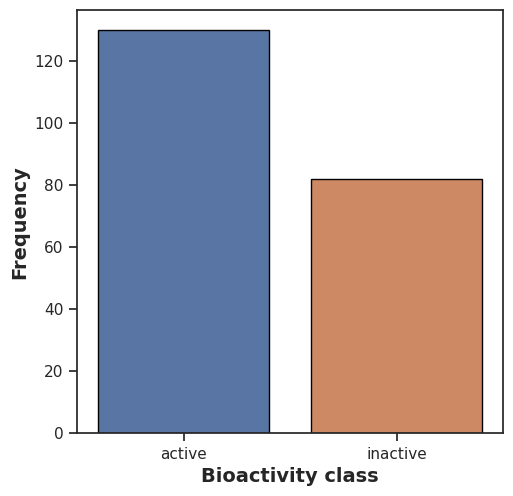

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

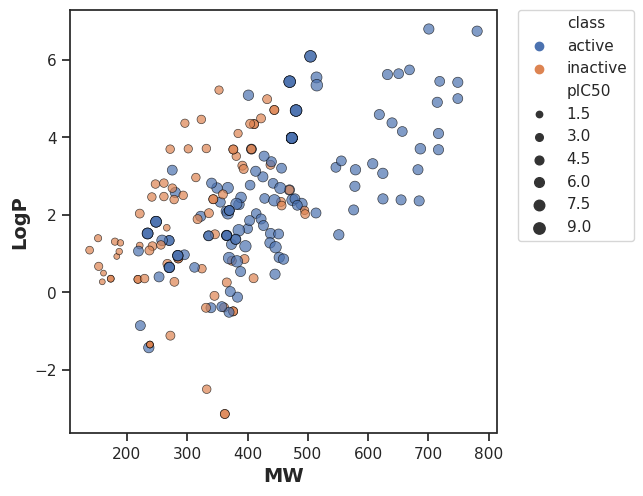

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

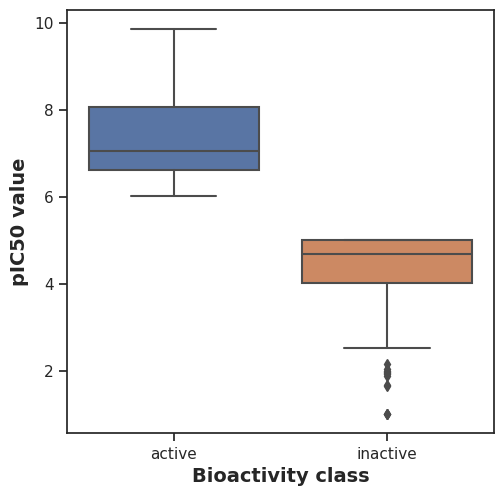

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [28]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,10660.0,1.111970e-34,0.05,Different distribution (reject H0)


#### **MW**

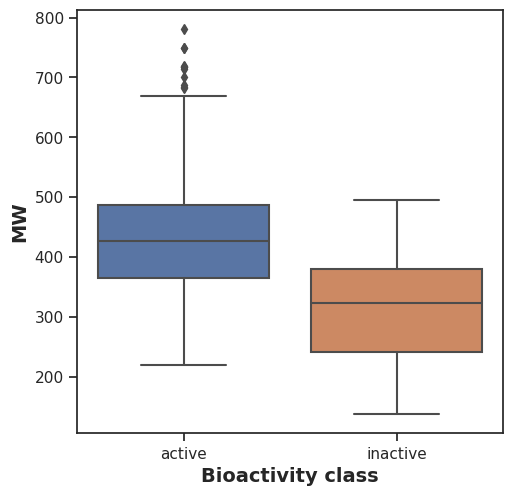

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8265.0,1.516166e-11,0.05,Different distribution (reject H0)


#### **LogP**

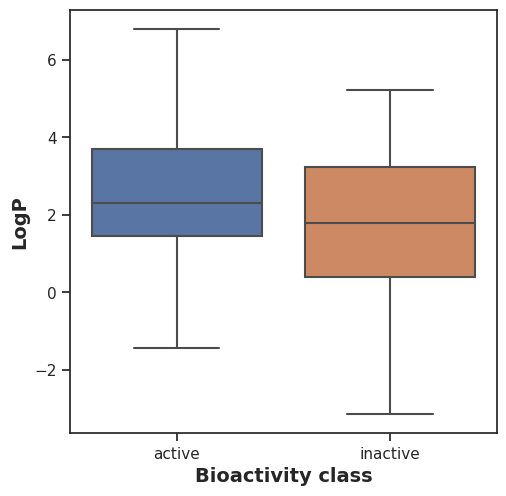

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6575.5,0.004206,0.05,Different distribution (reject H0)


#### **NumHDonors**

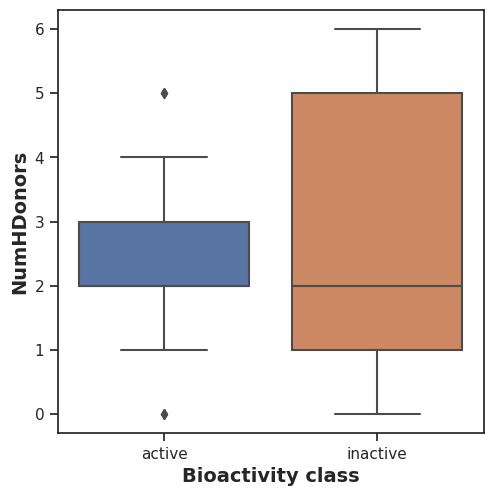

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5289.0,0.922977,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

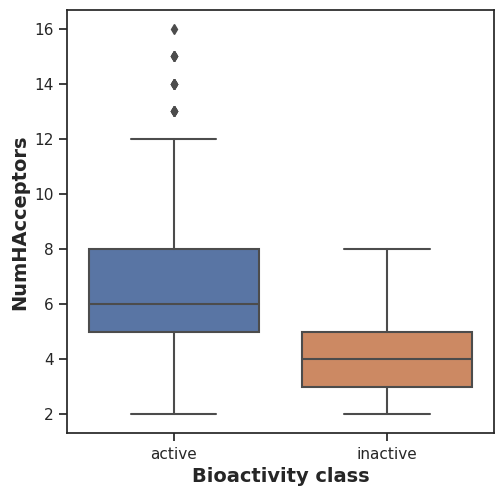

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [37]:
# save  mannwhitney('NumHAcceptors') in Data folder
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,7879.5,3.288426e-09,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [38]:
! zip -r EDA_results.zip . -i *.csv *.pdf *.png
! rm *.csv *.pdf *.png
! mv EDA_results.zip Data/

  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 38%)
rm: cannot remove '*.png': No such file or directory
